<a href="https://colab.research.google.com/github/pradeepvaranasi/ml_algo/blob/main/Unsupervised_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2023-11-01 15:35:48--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 74.125.135.101, 74.125.135.138, 74.125.135.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/krm5lq2ait3j4u8o723mtm8fjnoh9b13/1698852900000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=f3543d8b-9f13-45c8-9372-0706211f0dfb [following]
--2023-11-01 15:35:49--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/krm5lq2ait3j4u8o723mtm8fjnoh9b13/1698852900000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=f3543d8b-9f13-45c8-9372-0706211f0dfb
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 172.253.117.132, 2607

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.shape

(2500, 7)

# Clustering

given the data points. group them into k categories. such that
- within the group points are similar
- points in seperate group they represent disimarlity


# Classification

- mapping between input data and labels.
- decision boundary that can seperate most of the points of 1 group from rest group.

In [ ]:
data_size = 1000
num_iters = 10
num_clusters = 4

from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)

In [ ]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()


In [ ]:
data.shape

(2000, 2)

In [ ]:
data[:5]

array([[-0.46530384,  1.73299482],
       [-0.33963733,  3.84220272],
       [ 2.25309569,  0.99541446],
       [-1.58231872,  8.74311864],
       [-1.76144205,  2.05452668]])

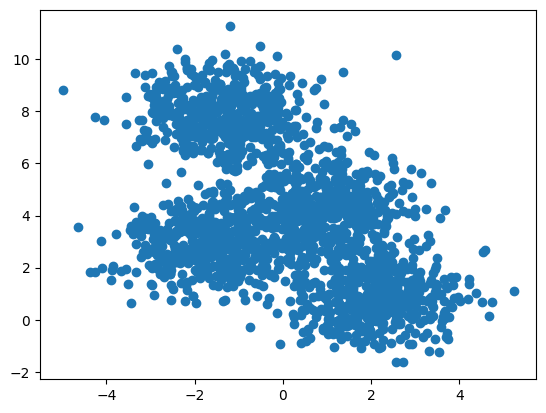

In [ ]:
plt.scatter(data[:, 0], data[:, 1] )

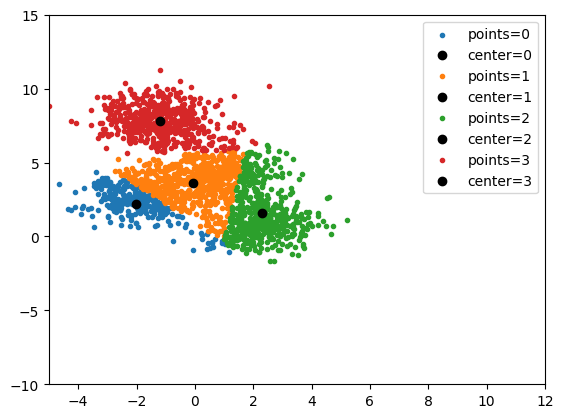

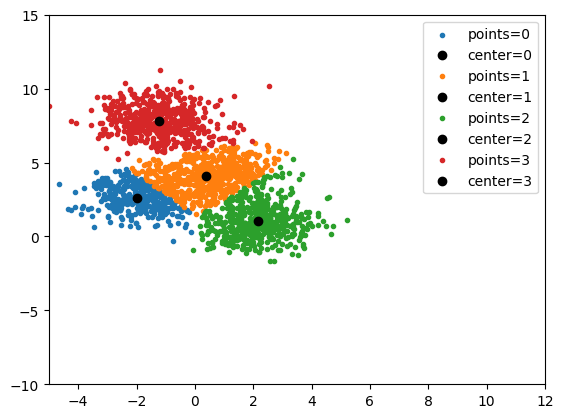

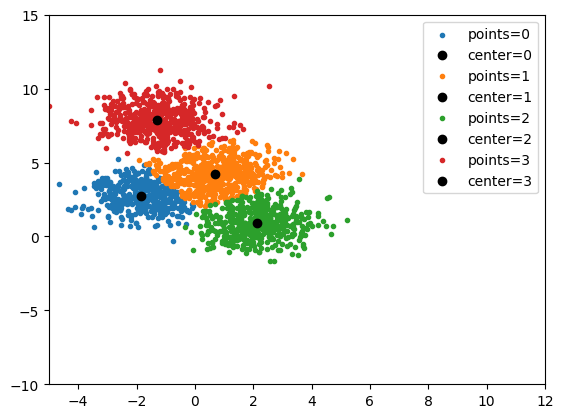

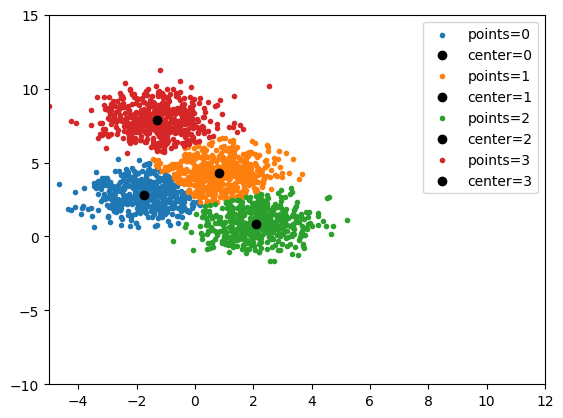

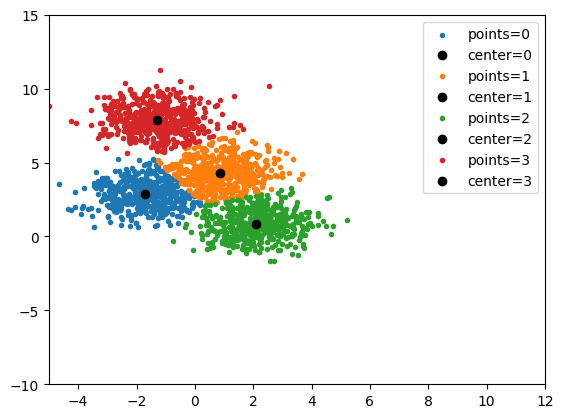

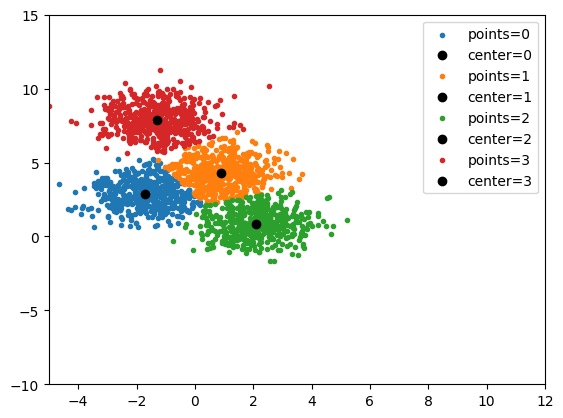

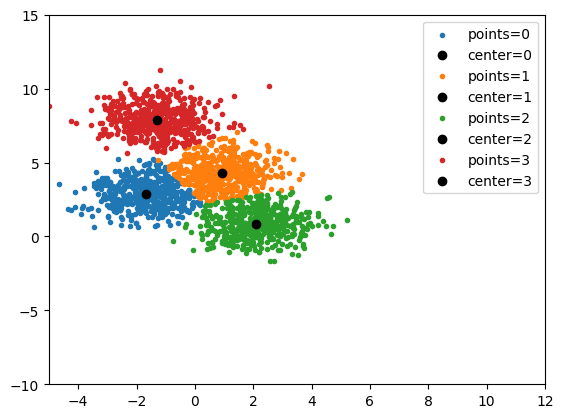

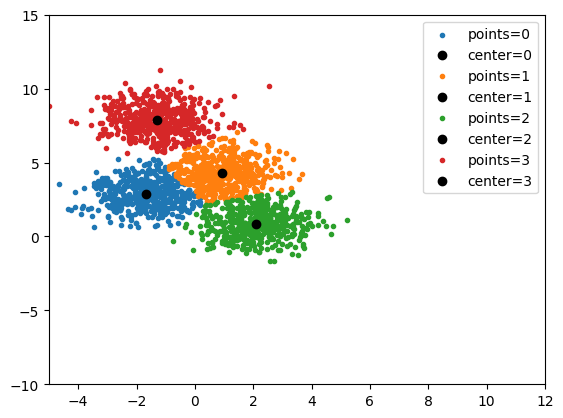

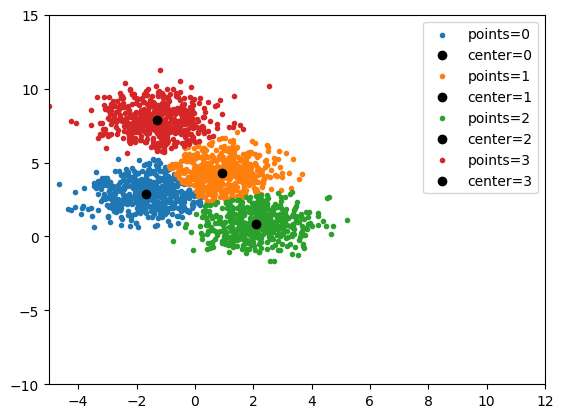

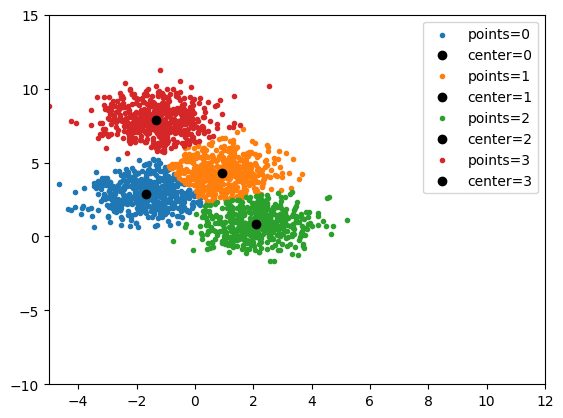

In [ ]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in (centroids):
      # Compute the difference, following by raising to power 2 and summing
      new_dist = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
      dist = np.hstack([dist,new_dist])
    return dist

def get_closest_centroid(x, centroids):

    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)

    return closest_centroid_index


# Loop over iterations
for n in range(num_iters):

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)

    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid

    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]

        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)

        # assign the new centroid
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=4)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
data[:5]

array([[-0.46530384,  1.73299482],
       [-0.33963733,  3.84220272],
       [ 2.25309569,  0.99541446],
       [-1.58231872,  8.74311864],
       [-1.76144205,  2.05452668]])

In [ ]:
model.labels_

array([2, 0, 3, ..., 0, 2, 0], dtype=int32)

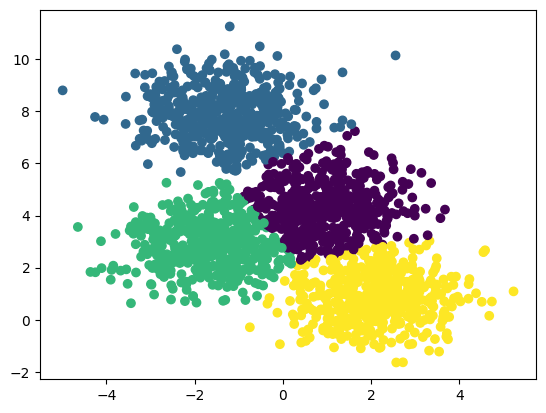

In [ ]:
plt.scatter(data[:, 0], data[:, 1] , c = model.labels_ )

In [ ]:
model = KMeans(n_clusters=3)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

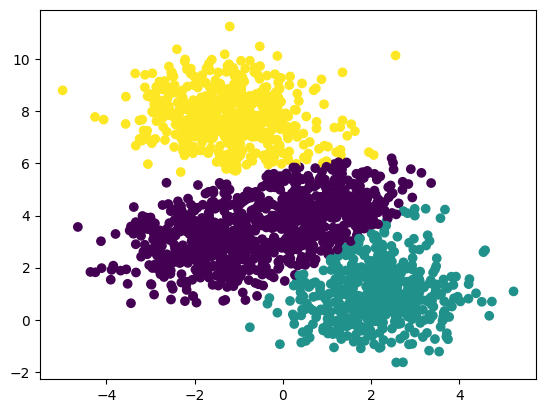

In [ ]:
plt.scatter(data[:, 0], data[:, 1] , c = model.labels_ )

In [ ]:
model.inertia_

5578.883821893049

## Elbow Method

In [ ]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

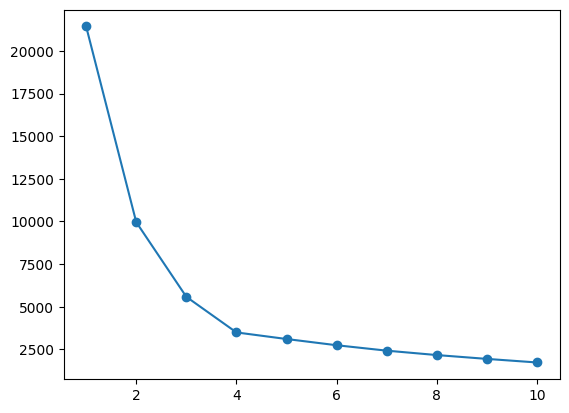

In [ ]:
plt.plot(range(1, 11), wcss, marker = 'o')

In [ ]:
# wcss